In [210]:
from sklearn.datasets import load_breast_cancer
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

df = pd.read_csv('/Users/albertxiong/Desktop/课程资料/NUS/SPH/Assignment 1/Assignment_1_data.csv')
df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,3459.0,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,NaN,3050.0,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,F,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,NaN,697.0,NaN,0.0,0.0,1.0,4.0,1.0,10,False
36485,F,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,NaN,2000.0,NaN,0.0,NaN,1.0,1.0,0.0,0,False
36486,F,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,NaN,3500.0,NaN,0.0,NaN,1.0,0.0,0.0,3,False
36487,M,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,NaN,1900.0,NaN,0.0,NaN,0.0,1.0,0.0,5,False


In [211]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
from sklearn.utils import shuffle
df = shuffle(df)
df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,1,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,3459.0,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,1,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,1,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,NaN,3050.0,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,1,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,1,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,0,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,NaN,697.0,NaN,0.0,0.0,1.0,4.0,1.0,10,False
36485,0,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,NaN,2000.0,NaN,0.0,NaN,1.0,1.0,0.0,0,False
36486,0,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,NaN,3500.0,NaN,0.0,NaN,1.0,0.0,0.0,3,False
36487,1,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,NaN,1900.0,NaN,0.0,NaN,0.0,1.0,0.0,5,False


In [212]:
nancol = df.isna().sum()
Missing_val = pd.DataFrame({"Columns":list(df.columns), "Total missing values":list(nancol)})
Missing_val

,Columns,Total missing values
0,gender,0
1,age,0
2,heart_rate_min,72
3,heart_rate_max,72
4,heart_rate_mean,72
5,mbp_min,88
6,mbp_max,88
7,mbp_mean,88
8,sbp_min,146
9,sbp_max,146


In [213]:
nancol.shape

(60,)

In [214]:
dfnew = df
for col in df:
    if df[col].isna().sum() > 4000:
        dfnew = dfnew.drop([col], axis=1)
dfnew = dfnew.fillna(method='ffill')
# dfnew.isna().sum()
dfnew

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,creatinine_max,hemoglobin_min,hemoglobin_max,urineoutput,sofa_coagulation,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,1,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,1.7,8.9,8.9,3459.0,0.0,1.0,0.0,1.0,3,False
1,1,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,1.5,12.6,13.3,2020.0,1.0,1.0,1.0,1.0,8,False
2,1,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,0.7,6.9,7.1,3050.0,1.0,1.0,1.0,0.0,4,False
3,1,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,1.6,11.8,12.8,1592.0,0.0,0.0,0.0,1.0,6,False
4,1,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,4.0,10.2,12.7,339.0,0.0,4.0,1.0,3.0,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,0,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,1.8,11.3,12.0,697.0,0.0,1.0,4.0,1.0,10,False
36485,0,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,1.0,11.5,11.5,2000.0,0.0,1.0,1.0,0.0,0,False
36486,0,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,0.6,8.8,9.6,3500.0,0.0,1.0,0.0,0.0,3,False
36487,1,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,1.1,11.6,12.8,1900.0,0.0,0.0,1.0,0.0,5,False


In [215]:
dfnew = dfnew.drop(['outcome'], axis=1)

for col in dfnew:
    dfnew[col] = (dfnew[col] - dfnew[col].mean())/dfnew[col].std()
dfnew

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,creatinine_min,creatinine_max,hemoglobin_min,hemoglobin_max,urineoutput,sofa_coagulation,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index
0,0.914024,-0.676099,1.464752,0.575120,1.167072,-0.257234,-0.234610,0.295874,-0.446385,0.669565,...,-0.088629,0.058426,-0.610640,-1.147452,1.219739,-0.583215,-0.061788,-0.871019,0.144526,-0.928126
1,0.914024,1.215508,-1.389475,-2.035632,-1.909938,0.042432,-0.534452,-0.642628,0.032566,-0.292987,...,0.047748,-0.049765,1.012335,0.878425,0.083463,0.628890,-0.061788,0.080756,0.144526,0.730365
2,0.914024,-1.526240,-0.061928,0.091647,-0.088675,0.417014,-0.577286,-0.217493,-0.027303,-0.818015,...,-0.497761,-0.482528,-1.487924,-1.976219,0.896781,0.628890,-0.061788,0.080756,-0.687801,-0.596428
3,0.914024,0.445089,-0.194683,-0.246784,-0.060811,1.016345,-0.191776,0.462621,-0.685860,0.013280,...,-0.020440,0.004330,0.661421,0.648211,-0.254499,-0.583215,-1.090341,-0.871019,0.144526,0.066969
4,0.914024,0.286804,0.402714,-0.391825,0.057560,-2.279976,-0.662955,-1.411146,-2.541794,-0.818015,...,1.411521,1.302618,-0.040406,0.602169,-1.243904,-0.583215,3.023869,0.080756,1.809181,1.393762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,-1.094033,1.133833,-0.792079,-1.117034,-1.020935,-4.377634,-0.448783,-0.417264,0.870730,0.188289,...,0.184126,0.112521,0.442100,0.279870,-0.961217,-0.583215,-0.061788,2.936079,0.144526,1.393762
36485,-1.094033,-2.102926,-0.792079,0.043300,-0.306479,0.491930,-0.620121,-0.121893,-0.027303,-0.336739,...,-0.225006,-0.320242,0.529829,0.049657,0.067670,-0.583215,-0.061788,0.080756,-0.687801,-1.923221
36486,-1.094033,-0.345968,0.004450,-0.440173,-0.139353,-0.706732,-0.577286,-1.486345,-0.266778,-1.211786,...,-0.565949,-0.536623,-0.654504,-0.825153,1.252114,-0.583215,-0.061788,-0.871019,-0.687801,-0.928126
36487,0.914024,0.770346,-0.526569,-0.826951,-0.751935,3.938084,0.664914,3.209468,3.205614,3.119695,...,-0.156818,-0.266146,0.573693,0.648211,-0.011293,-0.583215,-1.090341,0.080756,-0.687801,-0.264730


In [216]:

# X = dfnew.drop(['outcome'], axis=1)
X = dfnew
y = df['outcome'].astype(float)
# from sklearn import svm
# estimator = svm.SVC(kernel='linear', C=1.0)
estimator = DecisionTreeClassifier()

model = GeneticSelectionCV(estimator, cv=5, verbose=1, scoring="f1", n_population=30, crossover_proba=0.5,
  mutation_proba=0.2, n_generations=40, crossover_independent_proba=0.5,
  mutation_independent_proba=0.05, tournament_size=3, caching=True, max_features=20)

model = model.fit(X, y)
print('Features:', X.columns[model.support_])


Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	30    	[  0.062777  10.533333   0.011397]	[ 0.02301   4.52941   0.003457]	[ 0.010177  2.        0.004293]	[  0.115811  18.         0.020705]
1  	14    	[  0.076963  13.466667   0.012453]	[ 0.021653  3.518838  0.00397 ]	[ 0.048984  9.        0.002678]	[  0.115811  19.         0.020705]
2  	17    	[  0.09751   12.4        0.012951]	[ 0.01592   3.251666  0.005233]	[ 0.05171   8.        0.002678]	[  0.122391  17.         0.020705]
3  	18    	[  0.106692  13.         0.015139]	[ 0.012256  2.695676  0.004216]	[ 0.054182  9.        0.007932]	[  0.12342   19.         0.023003]
4  	16    	[  0.11123   13.466667   0.013491]	[ 0.00798   1.874981  0.00393 ]	[ 0.091109  9.        0.007256]	[  0.12342   18.         0.020064]
5  	15    	[  0.114365  14.233333   0.012877]	[ 0.00624   2.011357  0.004441]	[  0.0987

['gender', 'age', 'heart_rate_max', 'mbp_min', 'mbp_mean', 'sbp_mean', 'dbp_max', 'temperature_mean', 'glucose_min', 'wbc_max', 'creatinine_max', 'hemoglobin_max', 'urineoutput', 'sofa_coagulation', 'sofa_cardiovascular', 'sofa_cns']


/Users/albertxiong/miniforge3/envs/tensorflowenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


[]

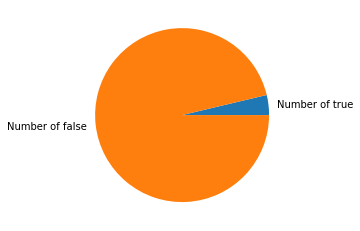

In [217]:
#data preprocessing
dfdata = dfnew[list(X.columns[model.support_])]
print(list(X.columns[model.support_]))
x_predict = dfdata[30000:]
y_predict = df['outcome'][30000:]

df_preprocess = dfdata[:30000]
df_preprocess['outcome'] = df['outcome'][:30000]
true_gp = df_preprocess[df_preprocess['outcome'] == True]
false_gp = df_preprocess[df_preprocess['outcome'] == False]

plt.pie([len(true_gp), len(false_gp)], labels=["Number of true", "Number of false"])
plt.plot()

In [218]:
#data preprocessing data balancing
true_gp_upsample = true_gp.sample(n=len(false_gp), replace=True, random_state=1)
df_preprocess_balanced = true_gp_upsample.append(false_gp)
df_preprocess_balanced = shuffle(df_preprocess_balanced)

y_train = df_preprocess_balanced['outcome']
x_train = df_preprocess_balanced.drop(['outcome'], axis=1)



In [219]:
#SVM model
from sklearn import svm
svm_model = svm.SVC(kernel='linear', C=1.0)

svm_model.fit(x_train, y_train)
y_svm = svm_model.predict(x_predict)


In [220]:
#evaluate
accurate_svm = accuracy_score(y_predict, y_svm)
Precision_svm = precision_score(y_predict, y_svm, average='weighted')
Recall_score_svm = recall_score(y_predict, y_svm, average='weighted')
F1_score_svm = f1_score(y_predict, y_svm, average='weighted')

print('Accuracy:{}'.format(accurate_svm))
print('Precision:{}'.format(Precision_svm))
print('Recall_score:{}'.format(Recall_score_svm))
print('F1_score:{}'.format(F1_score_svm))


Accuracy:0.804284173216212
Precision:0.953254778643965
Recall_score:0.804284173216212
F1_score:0.8651493707215531


In [221]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_lr = logistic_model.predict(x_predict)


In [222]:
#evaluate
accurate_lr = accuracy_score(y_predict, y_lr)
Precision_lr = precision_score(y_predict, y_lr, average='weighted')
Recall_score_lr = recall_score(y_predict, y_lr, average='weighted')
F1_score_lr = f1_score(y_predict, y_lr, average='weighted')

print('Accuracy:{}'.format(accurate_lr))
print('Precision:{}'.format(Precision_lr))
print('Recall_score:{}'.format(Recall_score_lr))
print('F1_score:{}'.format(F1_score_lr))


Accuracy:0.7677608260132532
Precision:0.9540315341242017
Recall_score:0.7677608260132532
F1_score:0.8418174876175496


In [223]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(max_depth=10)
decision_tree_model.fit(x_train, y_train)
y_dt = decision_tree_model.predict(x_predict)

In [224]:
#evaluate
accurate_dt = accuracy_score(y_predict, y_dt)
Precision_dt = precision_score(y_predict, y_dt, average='weighted')
Recall_score_dt = recall_score(y_predict, y_dt, average='weighted')
F1_score_dt = f1_score(y_predict, y_dt, average='weighted')

print('Accuracy:{}'.format(accurate_dt))
print('Precision:{}'.format(Precision_dt))
print('Recall_score:{}'.format(Recall_score_dt))
print('F1_score:{}'.format(F1_score_dt))

Accuracy:0.7634458314069964
Precision:0.947488944587966
Recall_score:0.7634458314069964
F1_score:0.8387211499092572


In [225]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=200, max_depth=10)
random_forest_model.fit(x_train, y_train)
y_rf = random_forest_model.predict(x_predict)

In [226]:
#evaluate
accurate_rf = accuracy_score(y_predict, y_rf)
Precision_rf = precision_score(y_predict, y_rf, average='weighted')
Recall_score_rf = recall_score(y_predict, y_rf, average='weighted')
F1_score_rf = f1_score(y_predict, y_rf, average='weighted')

print('Accuracy:{}'.format(accurate_rf))
print('Percosopn:{}'.format(Precision_rf))
print('Recall_score:{}'.format(Recall_score_rf))
print('F1_score:{}'.format(F1_score_rf))

Accuracy:0.862844814301125
Percosopn:0.9508478435156192
Recall_score:0.862844814301125
F1_score:0.9005615589181798


In [227]:
#Analysis
x = ["SVM", "Logistic Regression", "Decision Tree", "Random Forest"]
accuracy = [accurate_svm, accurate_lr, accurate_dt, accurate_rf]
Precision = [Precision_svm, Precision_lr, Precision_dt, Precision_rf]
Recall_score = [Recall_score_svm, Recall_score_lr, Recall_score_dt, Recall_score_rf]
F1_score = [F1_score_svm, F1_score_lr, F1_score_dt, F1_score_rf]

result_df = pd.DataFrame({"Models":x, "Accuracy":accuracy, "Precision":Precision, "Recall Score":Recall_score, "F1 Score":F1_score})
result_df

,Models,Accuracy,Precision,Recall Score,F1 Score
0,SVM,0.804284,0.953255,0.804284,0.865149
1,Logistic Regression,0.767761,0.954032,0.767761,0.841817
2,Decision Tree,0.763446,0.947489,0.763446,0.838721
3,Random Forest,0.862845,0.950848,0.862845,0.900562


/var/folders/82/t6wnz1wx41j7789hgnq13mj00000gn/T/ipykernel_45730/4054080849.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(x, rotation=25,fontsize=8)
/var/folders/82/t6wnz1wx41j7789hgnq13mj00000gn/T/ipykernel_45730/4054080849.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(x, rotation=25,fontsize=8)
/var/folders/82/t6wnz1wx41j7789hgnq13mj00000gn/T/ipykernel_45730/4054080849.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(x, rotation=25,fontsize=8)
/var/folders/82/t6wnz1wx41j7789hgnq13mj00000gn/T/ipykernel_45730/4054080849.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(x, rotation=25,fontsize=8)


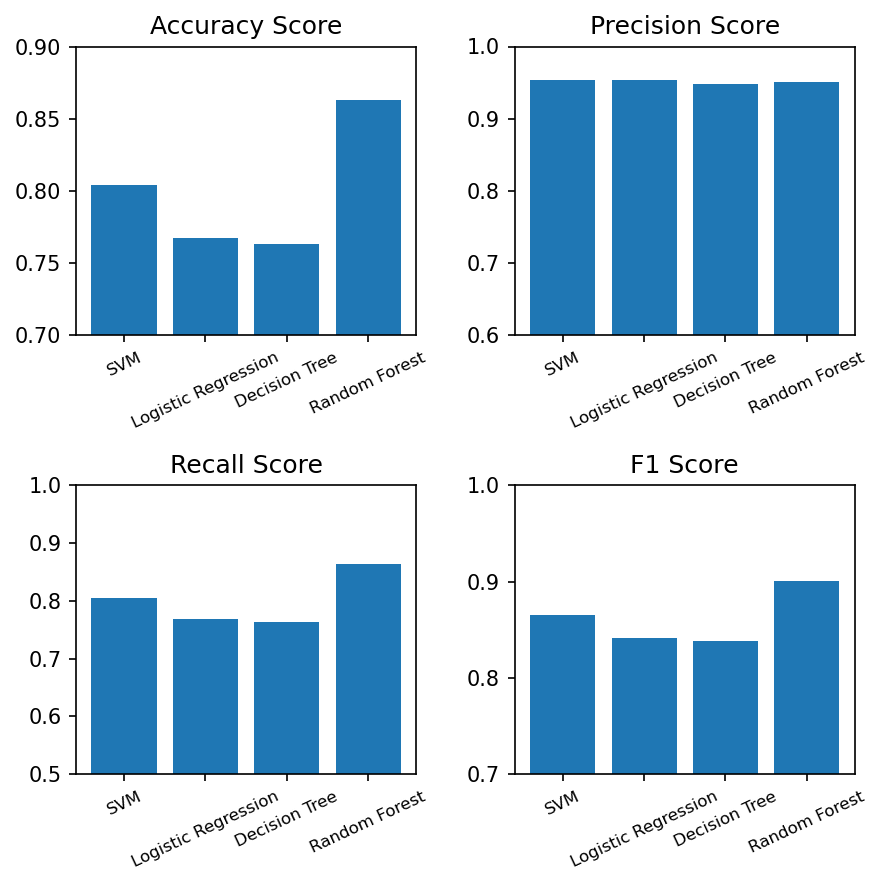

In [228]:
#Visualization

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, dpi=150, figsize=(6,6))

# Plot the first bar chart in the upper left subplot
axs[0, 0].bar(x, accuracy)
axs[0, 0].set_title('Accuracy Score')
axs[0, 0].set_ylim(0.7, 0.9)
# axs[0, 0].set_xticks(x, rotation=45, labelsize=20)
axs[0, 0].set_xticklabels(x, rotation=25,fontsize=8)

# Plot the second bar chart in the upper right subplot
axs[0, 1].bar(x, Precision)
axs[0, 1].set_title('Precision Score')
axs[0, 1].set_ylim(0.6, 1)
axs[0, 1].set_xticklabels(x, rotation=25,fontsize=8)

# Plot the third bar chart in the lower left subplot
axs[1, 0].bar(x, Recall_score)
axs[1, 0].set_title('Recall Score')
axs[1, 0].set_ylim(0.5, 1)
axs[1, 0].set_xticklabels(x, rotation=25,fontsize=8)
# Plot the fourth bar chart in the lower right subplot
axs[1, 1].bar(x, F1_score)
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylim(0.7, 1)
axs[1, 1].set_xticklabels(x, rotation=25,fontsize=8)

# Adjust the spacing between subplots and display the figure
fig.tight_layout()
plt.show()